In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from MLLibrary import LogisticRegression, Utilities,NormalizationScale, StandardizationScale, Metrics

In [33]:
x_data, y_data = Utilities.load_data('../data/Classification_train.csv',start_x = 1,start_y = 0,end_y = 1)

print(f'Train data: {x_data.shape} {y_data.shape}')

Train data: (30000, 784) (30000, 1)


In [25]:
scaler = StandardizationScale()
x_data_scaled = scaler.fit_transform(x_data)
scaler2 = NormalizationScale()
x_data_scaled = scaler2.fit_transform(x_data_scaled)

print(f'Train data: {x_data_scaled.shape}')



Train data: (30000, 784)


Epoch  10 ⫸ Cost 0.021 ⫷
Epoch  20 ⫸ Cost 0.019 ⫷
Epoch  30 ⫸ Cost 0.018 ⫷
Epoch  40 ⫸ Cost 0.017 ⫷
Epoch  50 ⫸ Cost 0.017 ⫷
Epoch  60 ⫸ Cost 0.017 ⫷
Epoch  70 ⫸ Cost 0.016 ⫷
Epoch  80 ⫸ Cost 0.016 ⫷
Epoch  90 ⫸ Cost 0.016 ⫷
Epoch 100 ⫸ Cost 0.016 ⫷


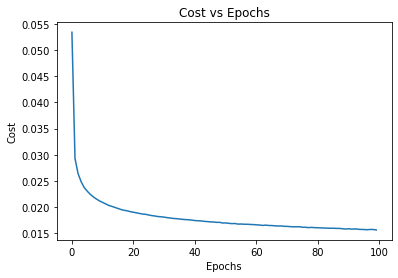

In [26]:
alpha = 0.6
epochs = 100
lambda_ = 1e-12

model = LogisticRegression()
_,_,cost_history = model.fit(x_data_scaled, y_data, alpha, epochs,lambda_, plot_cost=True)

In [27]:
yhat_train = model.predict(x_data_scaled)
acc_train = Metrics.classifier_accuracy(yhat_train, y_data)
print(f'Accuracy Train: {acc_train:.2f}')

Accuracy Train: 98.08


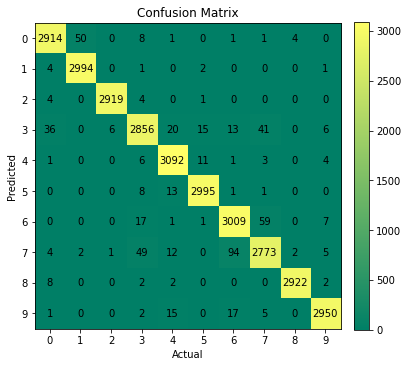

Precision: 0.9807646083888709
Recall: 0.9808871777246194


In [28]:
conf_mat, p,r = Metrics.confusion_matrix(yhat_train,y_data,metrics=True)
print(f'Precision: {p}')
print(f'Recall: {r}')

In [36]:
x_test = Utilities.load_data('../data/Classification_test.csv', start_x=1)
x_test_scaled = scaler.transform(x_test)
x_test_scaled = scaler2.transform(x_test_scaled)
print(f'Train data: {x_test_scaled.shape}')

Train data: (10000, 784)


In [37]:
y_test = model.predict(x_test_scaled)
print(y_test.shape)
df = pd.DataFrame(y_test, columns=['predicted value'])
df.to_csv('Classification_result.csv', index=False)

(10000, 1)
